**Dataset link**: https://www.kaggle.com/datasets/mexwell/us-software-engineer-jobs

In [39]:
import pandas as pd
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt

### Data Preparation

In [5]:
# data = pd.read_csv('data/us-software-engineer-jobs-zenrows.csv')

In [9]:
# data.head()

,title,company,salary,rating,review_count,types,location,relative_time,hires_needed,hires_needed_exact,...,indeed_applyable,ad_id,remote_location,source_id,hiring_event_job,indeed_apply_enabled,job_location_postal,company_overview_link,activity_date,location_extras
0,Android Developer,Shockoe,NaN,0.0,0,Full-time,"Richmond, VA",30+ days ago,NaN,NaN,...,False,NaN,False,11706594,False,False,NaN,NaN,NaN,NaN
1,Web Developer,"Denios, Inc.","$45,000 - $55,000 a year",0.0,0,Full-time,"Louisville, KY",30+ days ago,ONE,1,...,True,370154371.0,False,11468052,False,True,40219.0,NaN,Active 2 days ago,NaN
2,Sr. Android Developer,The Cervantes Group,NaN,4.1,22,Full-time,Remote,6 days ago,TWO_FOUR,2,...,True,NaN,False,9570478,False,True,NaN,/cmp/The-Cervantes-Group,Active 3 days ago,NaN
3,Junior Software Engineer,Medical Knowledge Group,NaN,0.0,0,Full-time,Remote,8 days ago,ONE,1,...,True,368864426.0,False,501562,False,True,NaN,NaN,Active 3 days ago,NaN
4,"Cloud Engineer (Software Engineer Advanced, Ex...",Federal Reserve Bank of New York,NaN,4.1,548,Full-time,"Kansas City, MO",2 days ago,NaN,NaN,...,False,NaN,False,1439,False,False,NaN,/cmp/Federal-Reserve-Bank-of-New-York,NaN,NaN


In [10]:
# print(data.columns)

Index(['title', 'company', 'salary', 'rating', 'review_count', 'types',
       'location', 'relative_time', 'hires_needed', 'hires_needed_exact',
       'urgently_hiring', 'remote_work_model', 'snippet', 'dradis_job', 'link',
       'new_job', 'job_link', 'sponsored', 'featured_employer',
       'indeed_applyable', 'ad_id', 'remote_location', 'source_id',
       'hiring_event_job', 'indeed_apply_enabled', 'job_location_postal',
       'company_overview_link', 'activity_date', 'location_extras'],
      dtype='object')


In [11]:
# data = data[['title', 'company', 'salary',  'types', 'location', 'relative_time', 'remote_location']]

In [13]:
# data.head()

,title,company,salary,types,location,relative_time,remote_location
0,Android Developer,Shockoe,NaN,Full-time,"Richmond, VA",30+ days ago,False
1,Web Developer,"Denios, Inc.","$45,000 - $55,000 a year",Full-time,"Louisville, KY",30+ days ago,False
2,Sr. Android Developer,The Cervantes Group,NaN,Full-time,Remote,6 days ago,False
3,Junior Software Engineer,Medical Knowledge Group,NaN,Full-time,Remote,8 days ago,False
4,"Cloud Engineer (Software Engineer Advanced, Ex...",Federal Reserve Bank of New York,NaN,Full-time,"Kansas City, MO",2 days ago,False


In [25]:
# nan = data[data.isna().any(axis=1)]
# len(nan)

42070

In [26]:
# len(data['salary']) - len(nan)

16363

### Create 2 new csvs, one without NaN values at all and one with filled NaN values

In [28]:
# data = data.dropna()

In [29]:
# data.shape

(16363, 7)

In [31]:
# data.to_csv('data/us-software-engineer-jobs-zenrows (no NaN).csv')

## Exploratory Data Analysis
### Questiones to be answered

1. **Job Title Analysis:**
   - What are the most common job titles in software engineering roles?
   - How do job titles vary by location or company?

2. **Salary Analysis:**
   - What is the distribution of salaries across different software engineering roles?
   - How do salaries vary by job type (e.g., full-time, part-time, contract)?
   - Are there salary differences based on location or remote work options?

3. **Company Analysis:**
   - Which companies are posting the most software engineerinilar roles?
   - What are the top companies offering remote positions?

4. **Job Type Analysis:**
   - What is the distribution of job types (e.g., full-time, part-time, contract)?
   - How does the job type influence salary or location?

5. **Location Analysis:**
   - What are the most common locations for software engineering roles?
   - How does the location impact salary?
   - Which locations offer the most remotfe6ent times of the year?

7. **Remote Work Analysis:**
   - What proportion of job ads offer remote work options?
   - How do remote job opportunities vary by location or company?
   - Is there a salary difference between 7emote and non-remote roles?

8. **Correlation Analysis:**
   - What are the correlations between salary, job type, location, and remote work options?
   - How do these f8ctors interact with each other?

9. **Job Market Trends:**
   - What are the emerging trends in software engineering roles based on job titles, locations, and remote work?
   - Are there any significant changes in demand for certain skills or job types?


In [18]:
cleaned_jobs_df = pd.read_csv('data/us-software-engineer-jobs-zenrows (no NaN).csv')

In [19]:
filled_nan_jobs_df = pd.read_csv('data/us-software-engineer-jobs-zenrows (filled NaN).csv')

In [20]:
# cleaned_jobs_df.pop('Unnamed: 0')

0            1
1            7
2           14
3           17
4           19
         ...  
16358    58417
16359    58420
16360    58423
16361    58424
16362    58425
Name: Unnamed: 0, Length: 16363, dtype: int64

In [24]:
cleaned_jobs_df.head(5)

,title,company,salary,types,location,relative_time,remote_location
0,Web Developer,"Denios, Inc.","$45,000 - $55,000 a year",Full-time,"Louisville, KY",30+ days ago,False
1,"Real-Time, Embedded Software Engineer",Checkmate Partners,"$100,000 - $200,000 a year",Full-time,"San Francisco Bay Area, CA",5 days ago,False
2,Cyber Security Operation Center Manager (SOC),Goliath Solutions Group,$15 - $20 an hour,Full-time,"Fairview, TX",27 days ago,False
3,DevOps Engineer - Very Profitable Start-up,TechTalent NW,"$125,000 - $170,000 a year",Full-time,"Bellevue, WA",1 day ago,False
4,Lead Software/Java Engineer,Bectran,"$90,000 - $130,000 a year",Full-time,"Chicago, IL",7 days ago,False


In [ ]:
[salary_hour for salary_hour in cleaned_jobs_df['salary'] if 'hour' in salary_hour]

In [ ]:
[salary_year for salary_year in cleaned_jobs_df['salary'] if 'year' in salary_year]

**Job Title Analysis:**
   - What are the most common job titles in software engineering roles?
   - How do job titles vary by location or company?

In [26]:
# list of job titles
titles = [title for title in cleaned_jobs_df['title'].unique()]
len(titles) # 2883

2883

In [63]:
common_titles = cleaned_jobs_df['title'].value_counts().head(5)
common_titles

title
Senior Software Engineer    1106
Software Engineer           1095
Sr. Software Engineer        292
Software Developer           275
Full Stack Developer         201
Name: count, dtype: int64

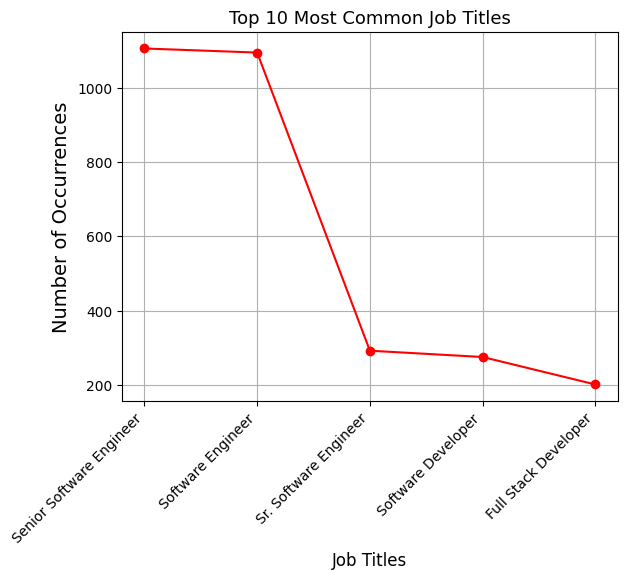

In [142]:
# Plotting the line chart
# plt.figure(figsize=(10, 6))
plt.plot(common_titles.index, common_titles.values, marker='o', linestyle='-', color='r')

# Adding titles and labels
plt.title('Top 10 Most Common Job Titles', fontsize=13)
plt.xlabel('Job Titles', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)

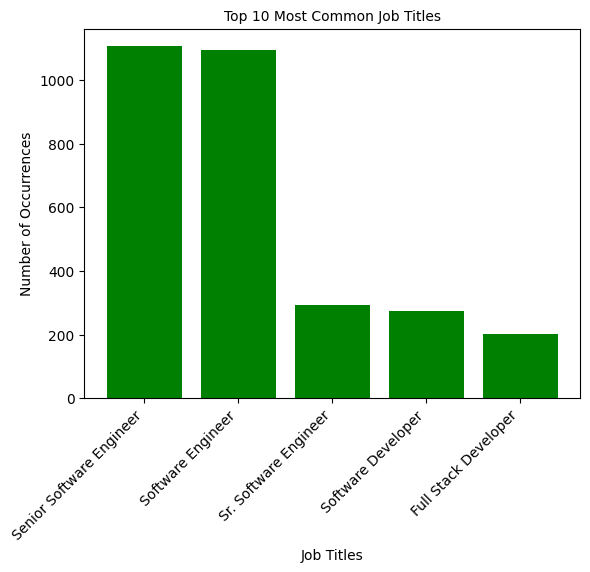

In [141]:
# plt.figure(figsize=(10, 6))
plt.bar(common_titles.index, common_titles.values, color='g')
plt.title('Top 10 Most Common Job Titles', fontsize=10)
plt.xlabel('Job Titles', fontsize=10)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

**5 Most Common Job Titles**
- Senior Software Engineer
- Software Engineer
- Software Developer
- Full Stack Developer


### How do job titles vary by location?

In [ ]:
location = [location for location in cleaned_jobs_df['location'].unique()]
location

In [ ]:
company = [company for company in cleaned_jobs_df['company'].unique()]
company

In [106]:
jobs_by_location = cleaned_jobs_df[['title', 'location']].value_counts().head(5)
jobs_by_location

title                     location   
Senior Software Engineer  Remote         271
Software Engineer         Remote         134
                          Austin, TX      87
                          Seattle, WA     79
Senior Software Engineer  Seattle, WA     70
Name: count, dtype: int64

In [111]:
location_job_count = cleaned_jobs_df['location'].value_counts().head(10)
location_job_count

location
Remote               3339
Austin, TX            806
Seattle, WA           401
New York, NY          375
San Francisco, CA     290
Chicago, IL           272
Atlanta, GA           269
Boston, MA            253
Denver, CO            224
Dallas, TX            220
Name: count, dtype: int64

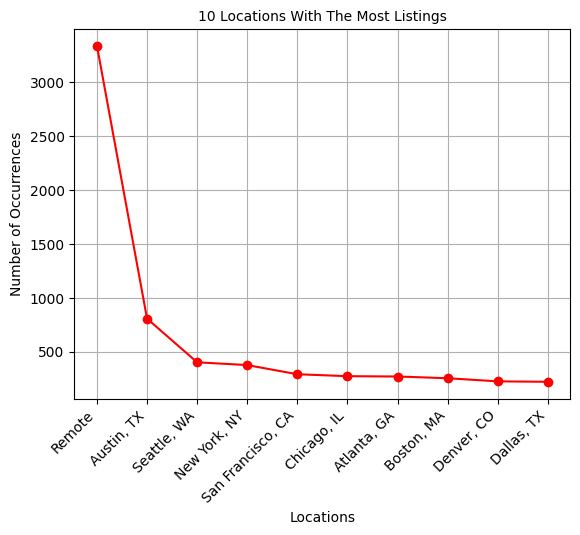

In [140]:
# Plotting the line chart
# plt.figure(figsize=(10, 6))
plt.plot(location_job_count.index, location_job_count.values, marker='o', linestyle='-', color='r')

# Adding titles and labels
plt.title('10 Locations With The Most Listings', fontsize=10)
plt.xlabel('Locations', fontsize=10)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)

In [121]:
location_title_counts = cleaned_jobs_df.groupby(['location', 'title']).size().reset_index(name='count')
location_title_counts

most_popular_jobs = location_title_counts.loc[location_title_counts.groupby('location')['count'].idxmax()]

sorted_most_popular_jobs = most_popular_jobs.sort_values(by='count', ascending=False).head(5)

sorted_most_popular_jobs

,location,title,count
3518,Remote,Senior Software Engineer,271
369,"Austin, TX",Software Engineer,87
4266,"Seattle, WA",Software Engineer,79
896,"Chicago, IL",Senior Software Engineer,66
2487,"New York, NY",Senior Software Engineer,53


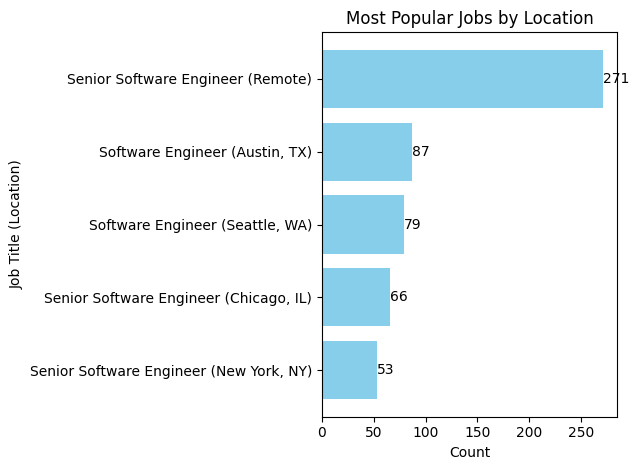

In [139]:
# Plotting
# plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_most_popular_jobs['title'] + ' (' + sorted_most_popular_jobs['location'] + ')', 
                sorted_most_popular_jobs['count'], 
                color='skyblue')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Job Title (Location)')
plt.title('Most Popular Jobs by Location')
plt.gca().invert_yaxis()  # To display the highest counts at the top

# Adding value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, 
             f'{int(width)}', 
             va='center')

plt.tight_layout()
plt.show()


## **Locations with the most listings**

- Remote
- Austin, TX
- Seattle, WA
- 
New York, NY        5- 
San Francisco, CA

## What is the distribution of salaries across different software engineering roles?

In [ ]:
salaries = [salary for salary in cleaned_jobs_df['salary'].unique()]
sorted(salaries)

In [163]:
salaries_by_role = cleaned_jobs_df.groupby(['salary', 'title']).size().reset_index(name='frequency')
salaries_by_role

salaries_by_role_sorted = salaries_by_role.sort_values(by='frequency', ascending=False)
salaries_by_role_sorted.head(10)

,salary,title,frequency
3,"$1,000 - $6,000 a month",Sales Lead for Top-Rated Web Development Team ...,140
2,"$1,000 - $6,000 a month",Sales Lead Generation for Web Development Busi...,91
684,"$120,000 - $170,000 a year",Sr. Software Engineer,89
946,"$134,000 - $203,000 a year",Senior Software Engineer,74
680,"$120,000 - $170,000 a year",Senior Software Engineer,70
775,"$125,000 - $150,000 a year",Senior Software Engineer,69
4043,From $30 an hour,Entry Level Java Developer,65
780,"$125,000 - $150,000 a year",Sr. Software Engineer - Java Spring Boot,64
3680,"$90,000 - $130,000 a year",Lead Software/Java Engineer,63
375,"$109,000 - $159,000 a year",Software Engineer,62


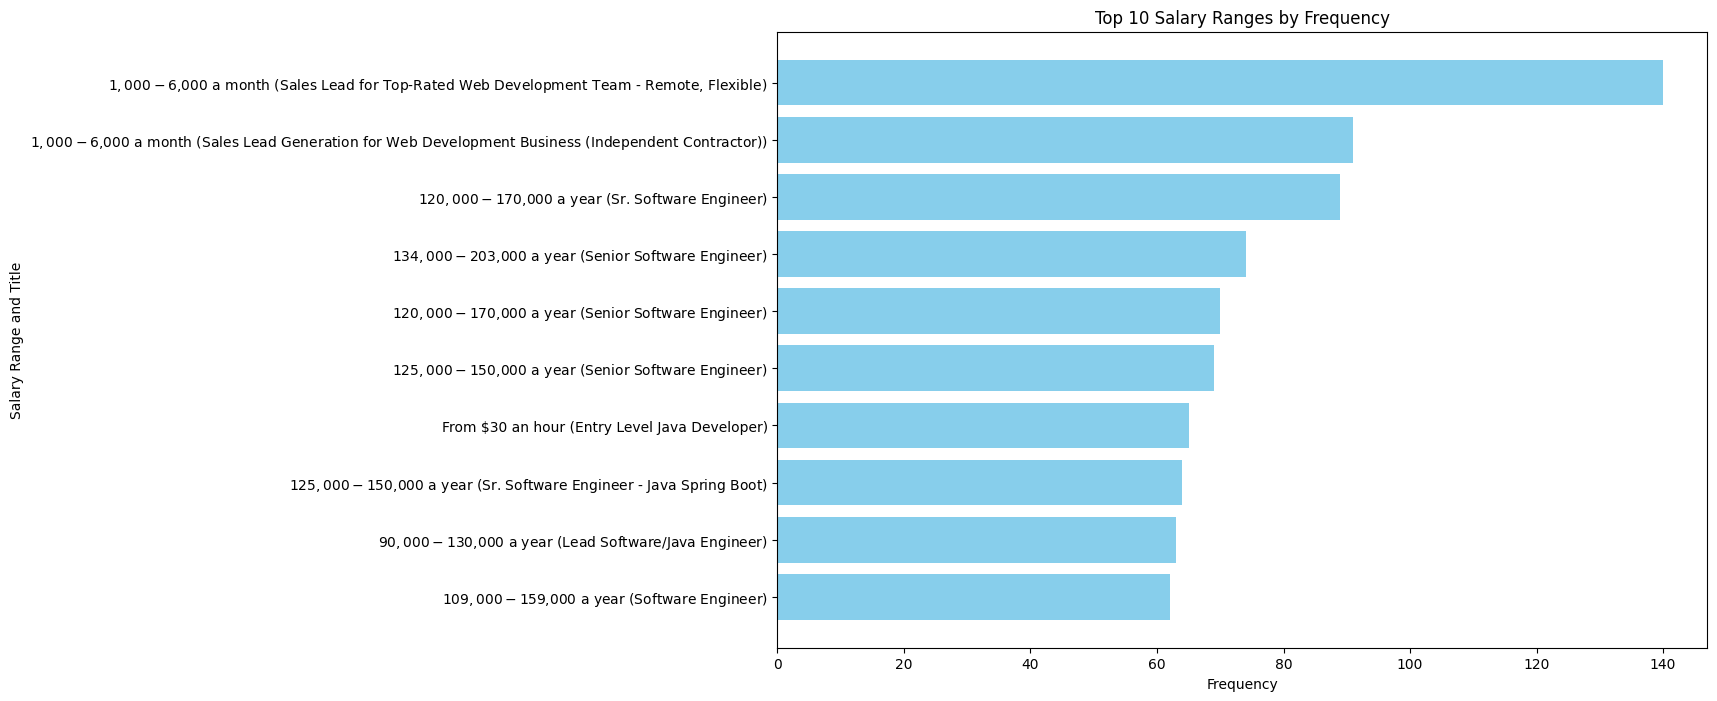

In [165]:
# Plot the top 10 salary ranges by frequency
top_10_salaries_by_role = salaries_by_role_sorted.head(10)

plt.figure(figsize=(12, 8))
plt.barh(top_10_salaries_by_role['salary'] + ' (' + top_10_salaries_by_role['title'] + ')', 
         top_10_salaries_by_role['frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Salary Range and Title')
plt.title('Top 10 Salary Ranges by Frequency')
plt.gca().invert_yaxis()  # Highest frequencies on top
plt.show()